# Module 2: Epidemic Modeling Template

## Team Members:
Christina Johnson, Luke Friscia 

## Epidemic Modeling

## Project Goal:
This project seeks to understand how a virus spreads and how fast it grows throughout a viral outbreak. We will analyze outbreak data such as day vs active reported daily cases to answer questions like, What does the early infection curve look like, how quickly is the disease spreading, and what factors shape the curve over time?

## 1. Data and disease background
You can fill out this section throughout the module as you uncover more information about the mystery disease.

By the end of the module (when submitting), you should have some information about each of the following points:
* Prevalence & incidence in the UVA population
* Economic burden (you can generalize from respiratory viruses)
* Symptoms
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology - you can generalize from viral biology)


## 2. Data Analysis


### 2a. Methods

We analyzed the mystery virus dataset using Python by:

- Importing pandas, matplotlib, numpy, and lineregress

- Loading the DATA RELEASE #1 CSV file

- Plotting day vs active reported daily cases

- Selecting early outbreak data 

- Taking the natural log of infections

- Using linear regression to estimate the growth rate 

- Using r to build an exponential fit curve and plotting it on top of the data


<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">ANALYSIS AFTER DATA RELEASE #1</b> 

</div>



### 2b. Plot the data & estimate initial growth rate (R0) from early data (through day 45)

#### 1. Import packages & load data


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


# Load the data
data = pd.read_csv(
    'C:\\Users\\chris_5y66qc1\\Downloads\\Academic File (Spring 2026)\\Computational BME\\Module-2-Epidemics-SIR-Modeling\\Data\\mystery_virus_daily_active_counts_RELEASE#1.csv',
    parse_dates=['date'], header=0, index_col=None
)

#### 2. b. Plot day vs active infections

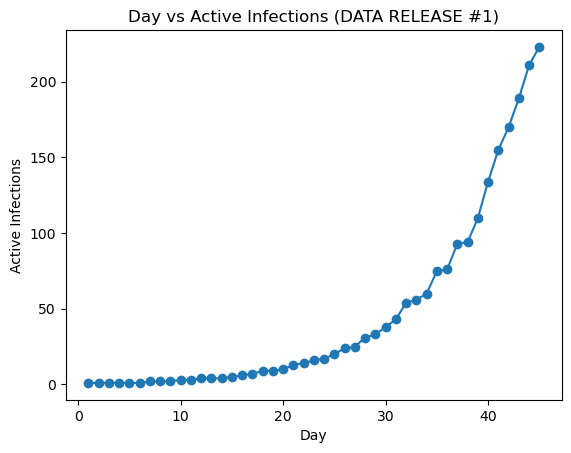

In [4]:
plt.plot(data['day'], data['active reported daily cases'], marker='o')
plt.xlabel('Day')
plt.ylabel('Active Infections')
plt.title('Day vs Active Infections (DATA RELEASE #1)')
plt.show()

<div style="
    border-left: 6px solid #429908;
    background-color: #eeffe1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#429908;">
What do we notice about the initial infections?
</b>

<span style="color:#429908; font-weight: normal;">
At the start, infections are low but then increase faster and faster. This looks like early exponential growth.
</span>

</div>

#### 3. Measure how quickly it’s spreading (estimate growth rate r)

We model early outbreak growth using:

I(t) = e^(rt)

We define an exponential function and use curve_fit to estimate the growth rate r

In [5]:
# Select early exponential growth phase (adjust range if needed)
early_data = data[data['day'] < 15]

t = early_data['day']
I = early_data['active reported daily cases']

# Remove zeros 
mask = I > 0
t = t[mask]
I = I[mask]

# Take log
log_I = np.log(I)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(t, log_I)

r = slope
print("Estimated growth rate r =", r)

Estimated growth rate r = 0.13408901741242535


Our estimated growth rate was r = 0.13408901741242535

<div style="
    border-left: 6px solid #429908;
    background-color: #eeffe1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#429908;">
How could we measure how quickly it’s spreading?
</b>

<span style="color:#429908; font-weight: normal;">
We use r (growth rate). A larger r means infections rise faster.
</span>

</div>

#### 4. Plot exponential fit on top of the data

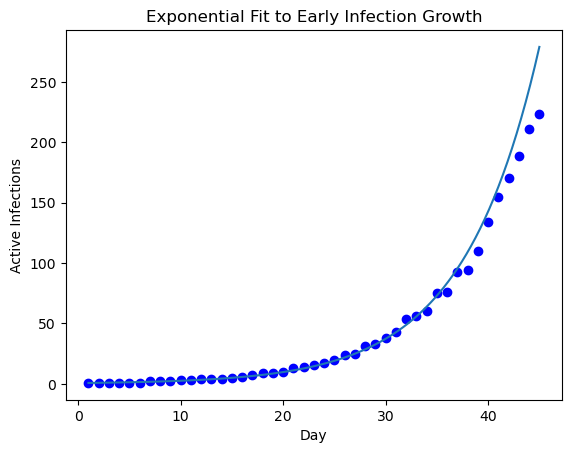

In [6]:
plt.figure()

# Scatter original data
plt.scatter(data['day'], data['active reported daily cases'], label='Data', color='blue')

# Exponential fit curve
t_fit = np.linspace(data['day'].min(), data['day'].max(), 100)
I_fit = np.exp(intercept) * np.exp(r * t_fit)

plt.plot(t_fit, I_fit)

plt.xlabel("Day")
plt.ylabel("Active Infections")
plt.title("Exponential Fit to Early Infection Growth")
plt.show()

<div style="
    border-left: 6px solid #429908;
    background-color: #eeffe1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#429908;">
What information about the virus would help determine the outbreak curve shape?</b>

<span style="color:#429908; font-weight: normal;">

- Latent period (infected but not contagious yet)

- Infectious period (how long someone spreads the virus)

- How easily it transmits between people

- Whether recovered people can become susceptible again
</span>

</div>

#### 5. Estimate R₀

We assume the infectious period D is 9 days: 

γ = 1 / D 

R0 = 1 + r/γ

In [ ]:
D = 9 # assumed infectious period in days
gamma = 1 / D

R0 = 1 + r / gamma
print("Estimated R0 =", R0)

Estimated R0 = 2.206801156711828


Our estimated R₀ = 2.206801156711828

#### What viruses have a similar R₀?

Influenza:  influenza typically has an R₀ between about 1.3–2.5. It is a respiratory virus that spreads through droplets and causes symptoms such as fever, cough, sore throat, and body aches. It spreads best in crowded environments like schools and campuses.

Ebola: Ebola  disease has an R₀ between 1.5–2.5 during outbreaks. It spreads through direct contact with bodily fluids of infected individuals and can cause severe hemorrhagic fever with high mortality rates.


#### How accurate do you think your R₀ estimate is?

Our R₀ estimate of approximately 2.21 is likely reasonable but not exact because:

- We only used early outbreak data (days < 15).

- We assumed an infectious period of 9 days, but we do not know if this is the true infectious period 

- Real outbreaks do not follow perfect exponential growth.

Therefore, our R₀ estimate gives a good approximation of transmissibility, but it may change as more data becomes available.


<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">ANALYSIS AFTER DATA RELEASE #2</b> 

</div>



### 2c. Use Euler's method to solve the SEIR model.
This section should come from your python code after Data Release #2.

### 2d. Fit the SEIR model to the data by changing beta, gamma, and sigma.
This section should come from your python code after Data Release #2.

### 2e. Plot the model-predicted infections over time compared to the data.
This section should come from your python code after Data Release #2.

### 2e. Predict the day and amount of active cases at the peak of the epidemic spread.
This section should come from your python code after Data Release #2.



<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">ANALYSIS AFTER DATA RELEASE #3</b> 

</div>



### 2f. Plot the full dataset (Data Release #3) against your model.
This section should come from your python code after Data Release #3.


### 2g. Intervention strategies for new outbreak at VT (70 days of infection)
This section should come from your python code after Data Release #3.



## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*